### Feature Engineering  

In [5]:
import pandas as pd
import numpy as np 

data = pd.read_csv('train.csv')
data.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Missing Values

Q what is missig values? or why missing values



- Feature engineering is the process of transforming raw data into features that better represent the underlying problem to the predictive models, resulting in improved model accuracy on unseen data.

Q1. what are the differt type of missing Data?
####   1. Missing compaletely at randam (MCAR):-
 so the defination of MCAR is A variable is missing completely at random if probability of the beanig missing is same for
 all the observartion.when data is MCAR thier is obsulately on relationship between the data missing or any other value,
 observed or missing 



In [6]:
data.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [7]:
data[data['Embarked'].isnull()]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


2. #### Missing Data Not At Random (MNAR) : Systematic missing values
 when data is MCAR thier is obsulately relationship between the data missing or any other value,
 observed or missing 

In [8]:
data['cabin_null'] = np.where(data['Cabin'].isnull(),1,0)


#and also find the percentage of null values
data['cabin_null'].mean()


0.7710437710437711

In [9]:
data['cabin_null'].head(10)

0    1
1    0
2    1
3    0
4    1
5    1
6    0
7    1
8    1
9    1
Name: cabin_null, dtype: int32

In [10]:
data.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked', 'cabin_null'],
      dtype='object')

In [11]:
data.groupby(['Survived'])['cabin_null'].mean()

Survived
0    0.876138
1    0.602339
Name: cabin_null, dtype: float64

####  Missing At Random(MAR)



### All the techniques of handling missing values 

1. Mean/ Median/ mode Resplacement 
2. Random sample Imputation
3. capture NAN values with a new featture 
4. End of Distribution Imputation 
5. Arbiturary imputation 
6. Frequent categoreis imputation 

#### 1 Mean/ median/ mode replacement 

when shoude we applay this?

Mean/median/mode imputation is a totally assumption that the data are missing complitaly at random(MCAR). We can solve this with the replacing NAN with most frequent occutance of variable.


In [12]:
df=pd.read_csv('train.csv',usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [13]:
## lest see the  parcentage of missing values 

df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [14]:
def impute_nan(df,variable,median):
    df[variable+"_median"]=df[variable].fillna(median)

In [15]:
median=df.Age.median()
median

28.0

In [16]:
impute_nan(df,'Age',median)
df.head()

,Survived,Age,Fare,Age_median
0,0,22.0,7.2500,22.0
1,1,38.0,71.2833,38.0
2,1,26.0,7.9250,26.0
3,1,35.0,53.1000,35.0
4,0,35.0,8.0500,35.0


In [17]:
print(df['Age'].std())
print(df['Age_median'].std())

14.526497332334044
13.019696550973194


In [18]:
import matplotlib.pyplot as plt 
%matplotlib inline 

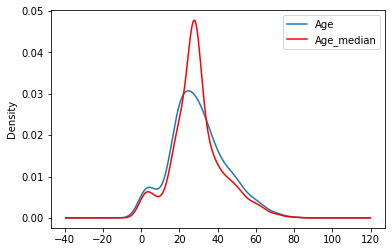

In [19]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind ='kde', ax=ax)
df['Age_median'].plot(kind='kde', ax=ax, color='red')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

### advantages and disadvantages of mean / median 

#### advantages 

1. Easy to impliment (Robust to outlies )
2. faster way to obtain the complitis dataset

#### disadvantage 

1. change or distortion in the orignal variance 
2. it impact cor-relation 

## 2 Random Sample Imputation 

Aim:- Random Sample Imputation consists of taking random obbservation from the data set and we use this observation to replace the nan values 

#### when should it ibe use ?
It assumes that the data are missing completely at random (MCAR)


In [20]:
df=pd.read_csv("train.csv", usecols=['Age','Fare', 'Survived'])

df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [21]:
df.isnull().sum()

Survived      0
Age         177
Fare          0
dtype: int64

In [23]:
df.isnull().mean()

Survived    0.000000
Age         0.198653
Fare        0.000000
dtype: float64

In [24]:
df['Age'].isnull().sum()

177

In [25]:
df['Age'].dropna().sample(df['Age'].isnull().sum(), random_state=0)

423    28.00
177    50.00
305     0.92
292    36.00
889    26.00
       ...  
539    22.00
267    25.00
352    15.00
99     34.00
689    15.00
Name: Age, Length: 177, dtype: float64

In [26]:
def imputer_na(df, variable, median):
    df[variable+"_median"]=df[variable].fillna(median)
    df[variable+"_random"]=df[variable]
    ## It will have the random sample to fullfil the na
    random_sample=df[variable].dropna().sample(df[variable].isnull().sum(), random_state=0)
    ## pandas need to have same index 
    random_sample.index=df[df[variable].isnull()].index
    df.loc[df[variable].isnull(),variable+'_random']=random_sample

In [27]:
median=df.Age.median()

In [28]:
median

28.0

In [29]:
imputer_na(df,'Age',median)

In [30]:
df.head()

,Survived,Age,Fare,Age_median,Age_random
0,0,22.0,7.2500,22.0,22.0
1,1,38.0,71.2833,38.0,38.0
2,1,26.0,7.9250,26.0,26.0
3,1,35.0,53.1000,35.0,35.0
4,0,35.0,8.0500,35.0,35.0


In [31]:
import matplotlib.pyplot as plt
%matplotlib inline 

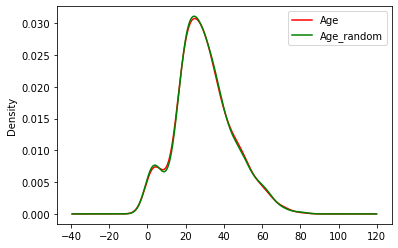

In [32]:
fig = plt.figure()
ax = fig.add_subplot(111)
df['Age'].plot(kind='kde',ax=ax, color='red')
df.Age_random.plot(kind='kde', ax=ax, color='green')
lines, labels = ax.get_legend_handles_labels()
ax.legend(lines, labels, loc='best')

#####  advantage and disadvantage of random sample imptation 

###### advantage 
1. easy to implimention 
2. less distrotion of variable

###### disadvantage 
1. evry setuation randomness want work

### 3 capture NA values with new feature

it is work is well if the data is not missing completely at random.

In [33]:
import pandas as pd 
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [34]:
import numpy as pd 
df['Age_NAN']=np.where(df['Age'].isnull(),1,0)#(variablr['col_name'].null_function(),1,0)1 for value is missing othr wise 0
df.head()

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0


In [35]:
df.Age.median()

28.0

In [36]:
df['Age'].fillna(df.Age.median(), inplace=True)
df.head(50)

,Survived,Age,Fare,Age_NAN
0,0,22.0,7.2500,0
1,1,38.0,71.2833,0
2,1,26.0,7.9250,0
3,1,35.0,53.1000,0
4,0,35.0,8.0500,0
5,0,28.0,8.4583,1
6,0,54.0,51.8625,0
7,0,2.0,21.0750,0
8,1,27.0,11.1333,0
9,1,14.0,30.0708,0


#### Advantage of this :-
1 Easy to implement.
2 it capture the importance of missing values 

#### disadvantage 
1 creatoing the additional feature 

###  4 End of Distrubution of imputation  

In [37]:
import numpy as np 
import pandas as pd
df=pd.read_csv('train.csv', usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [38]:
median=df.Age.median()
median

28.0

<AxesSubplot:>

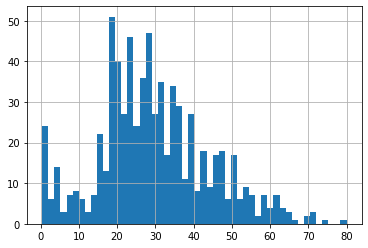

In [39]:
df.Age.hist(bins=50)

In [40]:
extreme=df.Age.mean()+3*df.Age.std()

<AxesSubplot:>

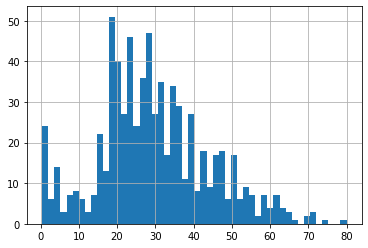

In [41]:
df.Age.hist(bins=50)

C:\Users\swapn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age'>

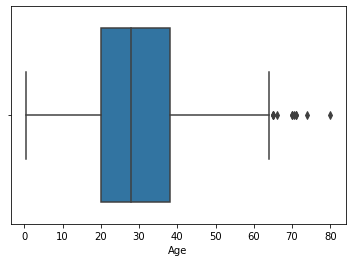

In [42]:
import seaborn as sns
sns.boxplot('Age', data=df)

In [43]:
def impute_nan(df,variable,median,extreme):
    df[variable+"_end_distribution"]=df[variable].fillna(extreme)
    df[variable].fillna(median, inplace=True)
impute_nan(df,'Age',df.Age.median(),extreme)
df.head(50)

,Survived,Age,Fare,Age_end_distribution
0,0,22.0,7.2500,22.00000
1,1,38.0,71.2833,38.00000
2,1,26.0,7.9250,26.00000
3,1,35.0,53.1000,35.00000
4,0,35.0,8.0500,35.00000
5,0,28.0,8.4583,73.27861
6,0,54.0,51.8625,54.00000
7,0,2.0,21.0750,2.00000
8,1,27.0,11.1333,27.00000
9,1,14.0,30.0708,14.00000


<AxesSubplot:>

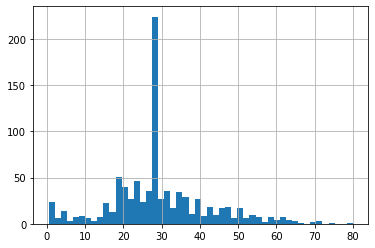

In [44]:
df['Age'].hist(bins=50)

<AxesSubplot:>

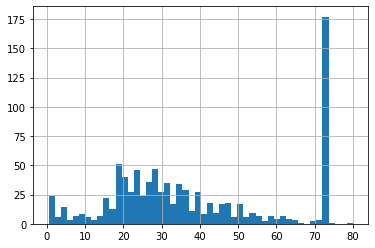

In [45]:
df['Age_end_distribution'].hist(bins=50)

C:\Users\swapn\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


<AxesSubplot:xlabel='Age_end_distribution'>

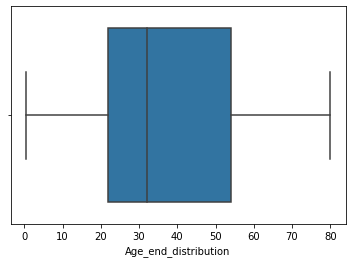

In [46]:
sns.boxplot('Age_end_distribution', data=df)

### Arbitrary Value Imputation 

this technique was derived from kaggle compitasion.  
it consist of replacing with NAN by arbitrary values 

In [47]:
import pandas as pd 

In [48]:
df = pd.read_csv("train.csv", usecols=['Age','Fare','Survived'])
df.head()

,Survived,Age,Fare
0,0,22.0,7.2500
1,1,38.0,71.2833
2,1,26.0,7.9250
3,1,35.0,53.1000
4,0,35.0,8.0500


In [49]:
def impute_nan(df, variable):
    df[variable+'_hundred']=df[variable].fillna(100)
    

<AxesSubplot:>

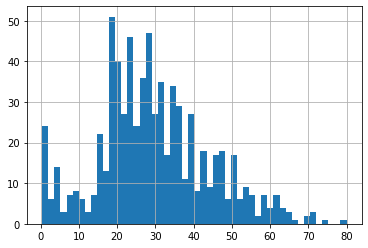

In [50]:
df['Age'].hist(bins=50)

In [53]:
### Arbitrary values 
### it should not be more frequantly pressent




#### how to haddle  categroical Missing Values 

##### Frequent Catagory Imputaion

In [54]:
df.columns

Index(['Survived', 'Age', 'Fare'], dtype='object')

In [55]:
import pandas as pd 
df=pd.read_csv("loan.csv")
df.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

In [56]:
df=pd.read_csv("loan.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [57]:
df.isnull().sum()

BsmtQual        37
FireplaceQu    690
GarageType      81
SalePrice        0
dtype: int64

In [58]:
df.isnull().mean().sort_values(ascending=True)

SalePrice      0.000000
BsmtQual       0.025342
GarageType     0.055479
FireplaceQu    0.472603
dtype: float64

#### compute the frequncy with ever feature 

<AxesSubplot:xlabel='BsmtQual'>

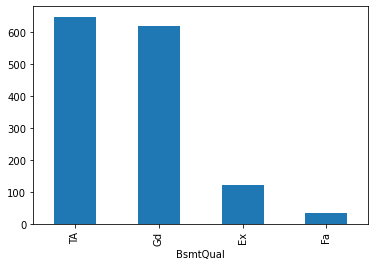

In [59]:
df.groupby(['BsmtQual'])['BsmtQual'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:xlabel='SalePrice'>

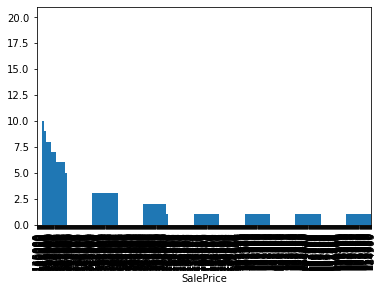

In [60]:
df.groupby(['SalePrice'])['SalePrice'].count().sort_values(ascending=False).plot.bar()

<AxesSubplot:>

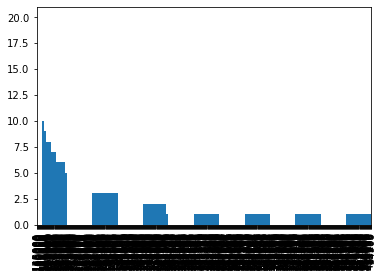

In [61]:
df['SalePrice'].value_counts().plot.bar()

<AxesSubplot:>

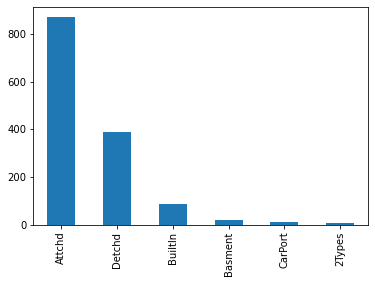

In [62]:
df['GarageType'].value_counts().plot.bar()

<AxesSubplot:>

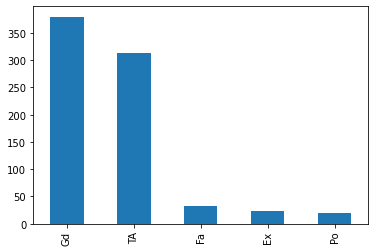

In [63]:
df['FireplaceQu'].value_counts().plot.bar()

In [64]:
### replacing function 

def impute_nan(df,variable):
    most_frequent_category=df[variable].value_counts().index[0]
    df[variable].fillna(most_frequent_category,inplace=True)

In [65]:
for feature in ['BsmtQual','GarageType','SalePrice','FireplaceQu']:
    impute_nan(df,feature)
   

In [66]:
df.isnull().mean()

BsmtQual       0.0
FireplaceQu    0.0
GarageType     0.0
SalePrice      0.0
dtype: float64

#### adding a variable to capture a NAN

In [67]:
df=pd.read_csv("loan.csv", usecols=['BsmtQual','FireplaceQu','GarageType','SalePrice'])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice
0,Gd,NaN,Attchd,208500
1,Gd,TA,Attchd,181500
2,Gd,TA,Attchd,223500
3,TA,Gd,Detchd,140000
4,Gd,TA,Attchd,250000


In [68]:
import numpy as np
df['BsmtQual_var']=np.where(df['BsmtQual'].isnull(),1,0)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [69]:
frequent=df['BsmtQual'].mode()[0]

In [70]:
df['BsmtQual'].fillna(frequent, inplace=True)

In [71]:
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var
0,Gd,NaN,Attchd,208500,0
1,Gd,TA,Attchd,181500,0
2,Gd,TA,Attchd,223500,0
3,TA,Gd,Detchd,140000,0
4,Gd,TA,Attchd,250000,0


In [97]:
df['FireplaceQu_var']=np.where(df['FireplaceQu'].isnull(),1,0)
frequent=df['FireplaceQu'].mode()[0]
df['FireplaceQu'].fillna(frequent, inplace=True)
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [107]:
def impute_nan(df,variable):
    df[variable+'_newvar']=df.where(df[variable].isnull(),"missing",df[variable])
df.head()

,BsmtQual,FireplaceQu,GarageType,SalePrice,BsmtQual_var,FireplaceQu_var
0,Gd,Gd,Attchd,208500,0,0
1,Gd,TA,Attchd,181500,0,0
2,Gd,TA,Attchd,223500,0,0
3,TA,Gd,Detchd,140000,0,0
4,Gd,TA,Attchd,250000,0,0


In [110]:
for feature in ['BsmtQual','FireplaceQu','GarageType']:
    impute_nan(df,feature)


TypeError: impute_nan() missing 1 required positional argument: 'inplace'